AIM : Neural Network implementation on mnist dataset (Image as an input)

ID_NO : 21CE045

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 48s 4us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


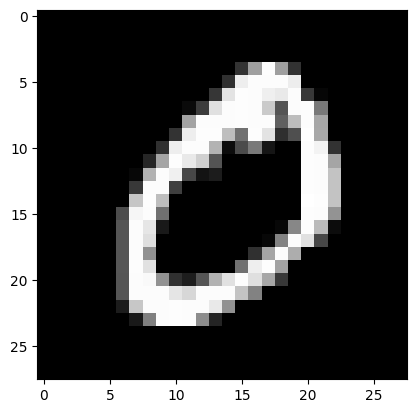

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:].reshape(28,28), cmap='gray')
plt.show()

In [9]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [10]:
y_train_encoded[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
x_train_norm = (x_train / 255.0) - 0.5
x_test_norm = (x_test / 255.0) - 0.5

In [12]:
print(x_train_norm.shape)
print(x_train[1,1,1],x_test_norm[1,1,1])

(60000, 28, 28)
0 -0.5


In [13]:
x_train_images = x_train_norm.reshape((-1, 784))
x_test_images = x_test_norm.reshape((-1, 784))

In [14]:
print(x_train_images.shape)
print(y_train_encoded.shape)
print(x_test_images.shape)
print(y_test_encoded.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [15]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=784 ,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [46]:
model.fit(x_train_images, y_train_encoded, epochs=20, batch_size=16, validation_split=0.2, callbacks=[es, mc],verbose=1)

Epoch 1/20
2990/3000 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9939
Epoch 1: val_accuracy did not improve from 0.98367
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0805 - val_accuracy: 0.9827
Epoch 2/20
2991/3000 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9936
Epoch 2: val_accuracy did not improve from 0.98367
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0798 - val_accuracy: 0.9812
Epoch 3/20
2982/3000 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9938
Epoch 3: val_accuracy did not improve from 0.98367
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0790 - val_accuracy: 0.9828
Epoch 4/20
2994/3000 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9936
Epoch 4: val_accuracy did not improve from 0.98367
3000/

In [47]:
scores = model.evaluate(x_test_images, y_test_encoded)
print("Accuracy: %.2f%%"% (scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9710
Accuracy: 97.10%


In [24]:
model.save_weights('mnistmodel.h5')

model.load_weights('mnistmodel.h5')